__Business Objective is:__
-  Which variables are significant in predicting the price of a house, and
-  How well those variables describe the price of a house

## Step 1: Data Preparation

#### Importing required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import RFE

In [2]:
# Reading the data
housing = pd.read_csv(r'D:\Python Practice\advanced_regression.csv')
housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
# Check the shape of the data set
housing.shape

(1460, 81)

In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
housing.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


### 1.1 Null value treatment

In [6]:
# Get the count of missing values for each column
missing_values = housing.isnull().sum().sort_values(ascending=False)

In [7]:
# Get the percentage of missing values for each column
missing_value_precentage = (missing_values/housing.shape[0]*100).sort_values(ascending=False)
missing_value_precentage

PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
FireplaceQu     47.260274
                  ...    
BsmtFullBath     0.000000
HeatingQC        0.000000
LowQualFinSF     0.000000
LandSlope        0.000000
SalePrice        0.000000
Length: 81, dtype: float64

In [8]:
#If any particular column has more than 80% missing values, it may not contribute any value in analysis
# So, Removing the columns with more than 80%

housing.drop(['PoolQC', 'MiscFeature', 'Alley', 'Fence'], axis=1, inplace=True)

In [9]:
# Now, check the missing value counts
housing.isnull().sum()[housing.isnull().sum()>0]

LotFrontage     259
MasVnrType        8
MasVnrArea        8
BsmtQual         37
BsmtCond         37
BsmtExposure     38
BsmtFinType1     37
BsmtFinType2     38
Electrical        1
FireplaceQu     690
GarageType       81
GarageYrBlt      81
GarageFinish     81
GarageQual       81
GarageCond       81
dtype: int64

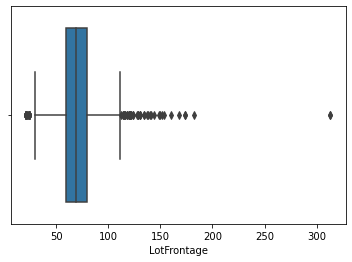

In [10]:
# Get the visual picture of LotFrontage to treat the missing values
sns.boxplot(housing.LotFrontage)
plt.show()

In [11]:
#As we do have some outliers, filling null values with median
housing['LotFrontage'] = housing['LotFrontage'].fillna(housing['LotFrontage'].median())

In [12]:
# Similarly get the value counts for FireplaceQu
housing['FireplaceQu'].value_counts()

Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

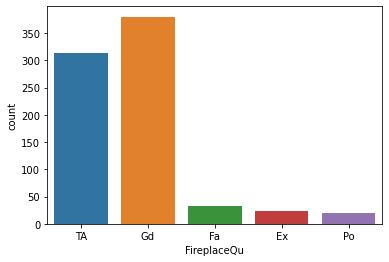

In [13]:
# Getting the visual picture of FireplaceQu value counts
sns.countplot(x = 'FireplaceQu', data=housing)
plt.show()

In [14]:
# As TA & GD values are similar in counts and the missing values are more than the mode, imputing them as a separate
housing['FireplaceQu'] = housing['FireplaceQu'].fillna('NotAvailable')

In [15]:
# Similarly replacing the missing values for below columns with Not available
housing['GarageType'] = housing['GarageType'].fillna('NotAvailable')
housing['GarageYrBlt'] = housing['GarageYrBlt'].fillna('NotAvailable')
housing['GarageFinish'] = housing['GarageFinish'].fillna('NotAvailable')
housing['GarageQual'] = housing['GarageQual'].fillna('NotAvailable')
housing['GarageCond'] = housing['GarageCond'].fillna('NotAvailable')

In [16]:
# Now, checking the shape of dataset
housing.shape

(1460, 77)

In [17]:
#Dropping remaining rows which are having null values, as the % of missing values are less than 3% for any of the columns
housing.dropna(inplace=True)

In [18]:
# After treating the Null values, checking the shape of dataset
housing.shape

(1412, 77)

In [19]:
housing.isnull().sum()[housing.isnull().sum()>0]
#This confirms that there are no null values

Series([], dtype: int64)

### 1.2 Creating additional column

In [20]:
# Deriving a new column as Age of the house
# Remodel date (same as construction date if no remodeling or additions). 
# So, using YearRemodAdd for calculating property age instead of YearBuilt

housing['AgeOfHouse'] = housing['YrSold'] - housing['YearRemodAdd']

In [21]:
# Based on Data dictionary, below columns datatypes are changed
housing['MSSubClass'] = housing['MSSubClass'].astype('object')

housing = housing.replace({'ExterQual':{'Po':1,'Fa':2, 'TA':3, 'Gd':4, 'Ex':5, 'NotAvailable':6}})
housing = housing.replace({'ExterCond':{'Po':1,'Fa':2, 'TA':3, 'Gd':4, 'Ex':5, 'NotAvailable':6}})
housing = housing.replace({'BsmtQual':{'NA':0,'Po':1,'Fa':2, 'TA':3, 'Gd':4, 'Ex':5, 'NotAvailable':6}})
housing = housing.replace({'BsmtCond':{'NA':0,'Po':1,'Fa':2, 'TA':3, 'Gd':4, 'Ex':5, 'NotAvailable':6}})
housing = housing.replace({'BsmtExposure':{'NA':0, 'No':1,'Mn':2, 'Av':3, 'Gd':4, 'NotAvailable':5}})
housing = housing.replace({'BsmtFinType1':{'NA':0,'Unf':1,'LwQ':2, 'Rec':3, 'BLQ':4, 'ALQ':5, 'GLQ':6, 'NotAvailable':7}})
housing = housing.replace({'BsmtFinType2':{'NA':0,'Unf':1,'LwQ':2, 'Rec':3, 'BLQ':4, 'ALQ':5, 'GLQ':6, 'NotAvailable':7}})
housing = housing.replace({'HeatingQC':{'Po':1,'Fa':2, 'TA':3, 'Gd':4, 'Ex':5, 'NotAvailable':6}})
housing = housing.replace({'CentralAir':{'Y':1,'N':0}})
housing = housing.replace({'KitchenQual':{'Po':1,'Fa':2, 'TA':3, 'Gd':4, 'Ex':5, 'NotAvailable':6}})
housing = housing.replace({'FireplaceQu':{'NA':0,'Po':1,'Fa':2, 'TA':3, 'Gd':4, 'Ex':5, 'NotAvailable':6}})
housing = housing.replace({'GarageQual':{'NA':0,'Po':1,'Fa':2, 'TA':3, 'Gd':4, 'Ex':5, 'NotAvailable':6}})
housing = housing.replace({'GarageCond':{'NA':0,'Po':1,'Fa':2, 'TA':3, 'Gd':4, 'Ex':5, 'NotAvailable':6}})
housing = housing.replace({'PoolQC':{'NA':0,'Po':1,'Fa':2, 'TA':3, 'Gd':4, 'Ex':5, 'NotAvailable':6}})


### 1.3 Removing unnecessary columns

In [22]:
#Dropping the used columns in deriving new feature. Also dropping ID column.
housing.drop(['Id','YrSold', 'MoSold','YearBuilt','YearRemodAdd'], axis=1, inplace=True)

In [23]:
# Based on glancing the data, we can see that there are few features with single value as major portion
# Fet the highest value count of each field

fields = []
counts = []
percents = []
for i in housing.columns.to_list():
    fields.append(housing[i].value_counts().sort_values(ascending=False).index[0])
    counts.append(housing[i].value_counts().sort_values(ascending=False).values[0])
    percents.append(housing[i].value_counts().sort_values(ascending=False).values[0]/housing.shape[0]*100)

In [24]:
# Creating a dataframe with value counts and their % in their respective field
df_value_counts = pd.DataFrame({'Column_Name':housing.columns,'Field_Name':fields, 'Count':counts, 'Percentage':percents})
df_value_counts

,Column_Name,Field_Name,Count,Percentage
0,MSSubClass,20,515,36.473088
1,MSZoning,RL,1111,78.682720
2,LotFrontage,69.0,262,18.555241
3,LotArea,9600,24,1.699717
4,Street,Pave,1406,99.575071
...,...,...,...,...
68,MiscVal,0,1363,96.529745
69,SaleType,WD,1224,86.685552
70,SaleCondition,Normal,1159,82.082153
71,SalePrice,140000,20,1.416431


In [25]:
# Get the list of columns with more than 90% single values
columns_with_90 = df_value_counts[df_value_counts.Percentage>90].Column_Name
columns_with_90

4           Street
7        Utilities
9        LandSlope
12      Condition2
18        RoofMatl
27        BsmtCond
35         Heating
37      CentralAir
38      Electrical
41    LowQualFinSF
44    BsmtHalfBath
48    KitchenAbvGr
51      Functional
60      GarageCond
61      PavedDrive
65       3SsnPorch
66     ScreenPorch
67        PoolArea
68         MiscVal
Name: Column_Name, dtype: object

In [26]:
# Dropping such fields as the data will be biased
housing.drop(columns_with_90, axis=1, inplace=True)

In [27]:
# Checking the dataset shape after treating biased data
housing.shape

(1412, 54)

In [28]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1412 entries, 0 to 1459
Data columns (total 54 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1412 non-null   object 
 1   MSZoning       1412 non-null   object 
 2   LotFrontage    1412 non-null   float64
 3   LotArea        1412 non-null   int64  
 4   LotShape       1412 non-null   object 
 5   LandContour    1412 non-null   object 
 6   LotConfig      1412 non-null   object 
 7   Neighborhood   1412 non-null   object 
 8   Condition1     1412 non-null   object 
 9   BldgType       1412 non-null   object 
 10  HouseStyle     1412 non-null   object 
 11  OverallQual    1412 non-null   int64  
 12  OverallCond    1412 non-null   int64  
 13  RoofStyle      1412 non-null   object 
 14  Exterior1st    1412 non-null   object 
 15  Exterior2nd    1412 non-null   object 
 16  MasVnrType     1412 non-null   object 
 17  MasVnrArea     1412 non-null   float64
 18  ExterQua

## Step 2: Exploratory Data analysis

### 2.1 Correlation and distribution of variables

In [29]:
housing.corr()

,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtExposure,BsmtFinType1,...,Fireplaces,FireplaceQu,GarageCars,GarageArea,GarageQual,WoodDeckSF,OpenPorchSF,EnclosedPorch,SalePrice,AgeOfHouse
LotFrontage,1.000000,0.303055,0.232893,-0.055121,0.179106,0.162199,-0.017129,0.160644,0.158213,0.068340,...,0.232757,-0.165781,0.269393,0.324805,-0.072573,0.073858,0.133934,0.012227,0.333348,-0.078883
LotArea,0.303055,1.000000,0.104763,-0.002941,0.104010,0.051873,0.013794,0.079559,0.233128,0.057387,...,0.268960,-0.149816,0.153812,0.180207,-0.057054,0.172281,0.083860,-0.022978,0.264803,-0.011599
OverallQual,0.232893,0.104763,1.000000,-0.121155,0.409656,0.722659,-0.003496,0.663644,0.260779,0.185262,...,0.392978,-0.300041,0.607663,0.561612,-0.189157,0.230274,0.297678,-0.122678,0.786765,-0.541616
OverallCond,-0.055121,-0.002941,-0.121155,1.000000,-0.134961,-0.151448,0.393620,-0.290267,-0.083935,-0.038515,...,-0.030047,0.057337,-0.193904,-0.163341,0.008025,-0.013206,-0.041823,0.075663,-0.093567,-0.054196
MasVnrArea,0.179106,0.104010,0.409656,-0.134961,1.000000,0.345831,-0.024220,0.316950,0.166948,0.177333,...,0.241914,-0.198925,0.363992,0.370982,-0.086385,0.157566,0.124018,-0.116271,0.474525,-0.172425
ExterQual,0.162199,0.051873,0.722659,-0.151448,0.345831,1.000000,-0.004510,0.644031,0.231793,0.201869,...,0.241590,-0.172715,0.524449,0.490893,-0.142034,0.202814,0.282506,-0.158384,0.675683,-0.584821
ExterCond,-0.017129,0.013794,-0.003496,0.393620,-0.024220,-0.004510,1.000000,-0.089079,-0.014532,0.042788,...,0.023054,-0.019477,-0.018072,0.009371,-0.029931,0.036528,0.058698,0.033799,0.006933,-0.070451
BsmtQual,0.160644,0.079559,0.663644,-0.290267,0.316950,0.644031,-0.089079,1.000000,0.326139,0.275434,...,0.233098,-0.200018,0.528434,0.464764,-0.078821,0.256388,0.264929,-0.240590,0.643050,-0.567754
BsmtExposure,0.158213,0.233128,0.260779,-0.083935,0.166948,0.231793,-0.014532,0.326139,1.000000,0.301449,...,0.174023,-0.093987,0.246381,0.247619,-0.013337,0.233387,0.068134,-0.100214,0.351689,-0.205784
BsmtFinType1,0.068340,0.057387,0.185262,-0.038515,0.177333,0.201869,0.042788,0.275434,0.301449,1.000000,...,0.121743,-0.098964,0.181440,0.199237,-0.044052,0.154875,0.067766,-0.145256,0.275563,-0.195586


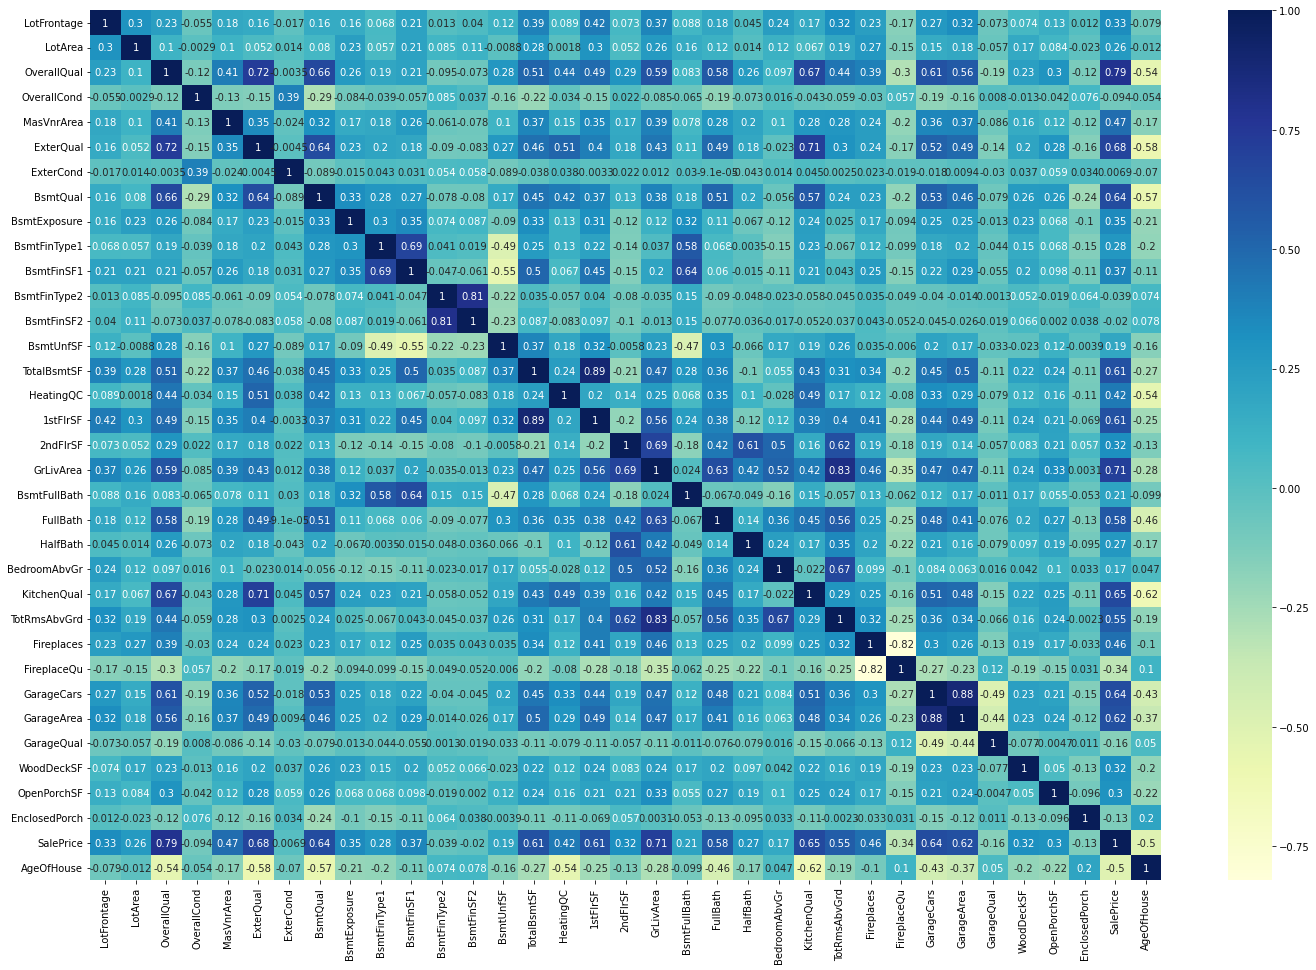

In [30]:
# plotting correlations on a heatmap

# figure size
plt.figure(figsize=(24,16))

# heatmap
sns.heatmap(housing.corr(), cmap="YlGnBu", annot=True)
plt.show()

__Observations with Sale Price:__

-  Positively correlated with OverallQual (0.79)
-  Positively correlated with MasVnrArea (0.47)
-  Positively correlated with ExterQual (0.68)
-  Positively correlated with BsmtQual (0.64)
-  Positiveely correlated with TotalBsmtSF (0.61)
-  Positiveely correlated with 1stFlrSF (0.61)
-  Positiveely correlated with GrLivArea (0.71)
-  Positively correlated with FullBath (0.58)
-  Positively correlated with KitchenQual (0.65)
-  Positively correlated with TotRmsAbvGrd (0.55)
-  Positively correlated with GarageCars (0.64)
-  Positively correlated with GarageArea (0.62)
-  Negetively correlated with AgeOfHouse (0.5)

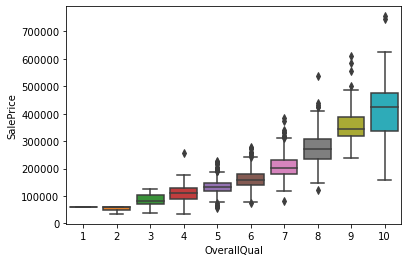

In [31]:
# Checking the distribution of overall Quality of the house
sns.boxplot(housing['OverallQual'], housing['SalePrice'])
plt.show()

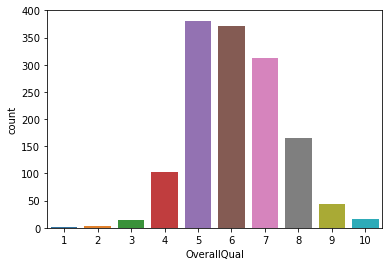

In [32]:
sns.countplot(housing['OverallQual'])
plt.show()

__Observations:__
-  Most of the Overall Quality of the house falls in 5, 6, 7 (Average, Above Average and Good)
-  Also, we could see a positive trend as the overall quality is increasing

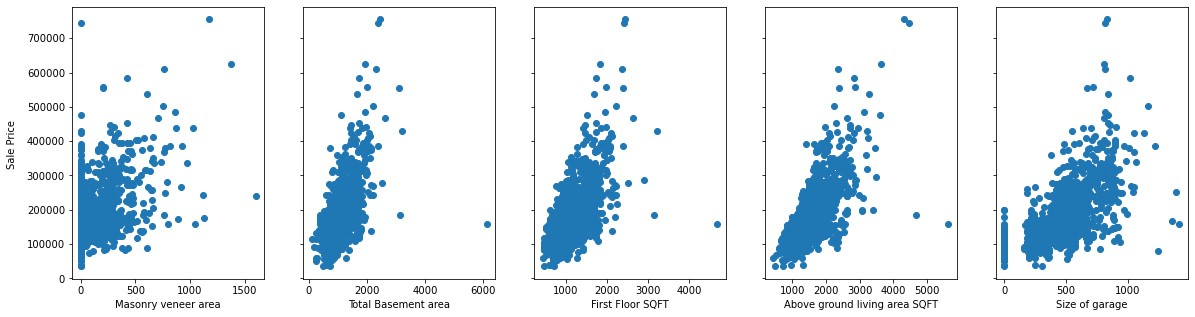

In [33]:
# Checking the distribution of top correlated variables with SalePrice
fig, ax = plt.subplots(1, 5, sharey=True, figsize=(20,5))


plt.subplot(1,5,1)
plt.scatter(housing['MasVnrArea'], housing['SalePrice'])
plt.xlabel('Masonry veneer area')

plt.subplot(1,5,2)
plt.scatter(housing['TotalBsmtSF'], housing['SalePrice'])
plt.xlabel('Total Basement area')

plt.subplot(1,5,3)
plt.scatter(housing['1stFlrSF'], housing['SalePrice'])
plt.xlabel('First Floor SQFT')

plt.subplot(1,5,4)
plt.scatter(housing['GrLivArea'], housing['SalePrice'])
plt.xlabel('Above ground living area SQFT')

plt.subplot(1,5,5)
plt.scatter(housing['GarageArea'], housing['SalePrice'])
plt.xlabel('Size of garage')

fig.text(0.08, 0.5, 'Sale Price', va='center', rotation='vertical')
plt.show()

__Observations:__
-  We could see some linear trend in the variables: Masonry veneer area, Total Basement area, First Floor SQFT, Above ground living area SQFT and Size of garage

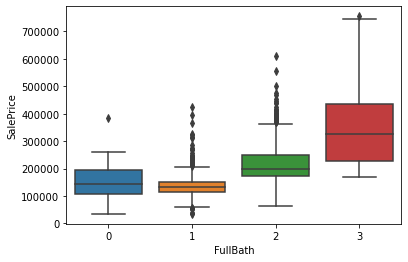

In [34]:
sns.boxplot(housing['FullBath'], housing['SalePrice'])
plt.show()

__Observations:__
-  If full bathrooms are 1, the price variation is very less
-  With 3 Bathrooms, the price range is high and its price is also high 

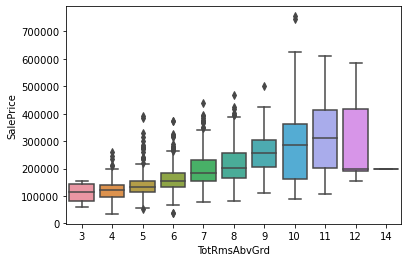

In [35]:
sns.boxplot(housing['TotRmsAbvGrd'], housing['SalePrice'])
plt.show()

__Observations:__
-  As the number of rooms above the ground is increasing, the price is also increasing.
-  With 12 number of rooms, based on 50 percentile, more number of sale transactions happened near lower end of price range 

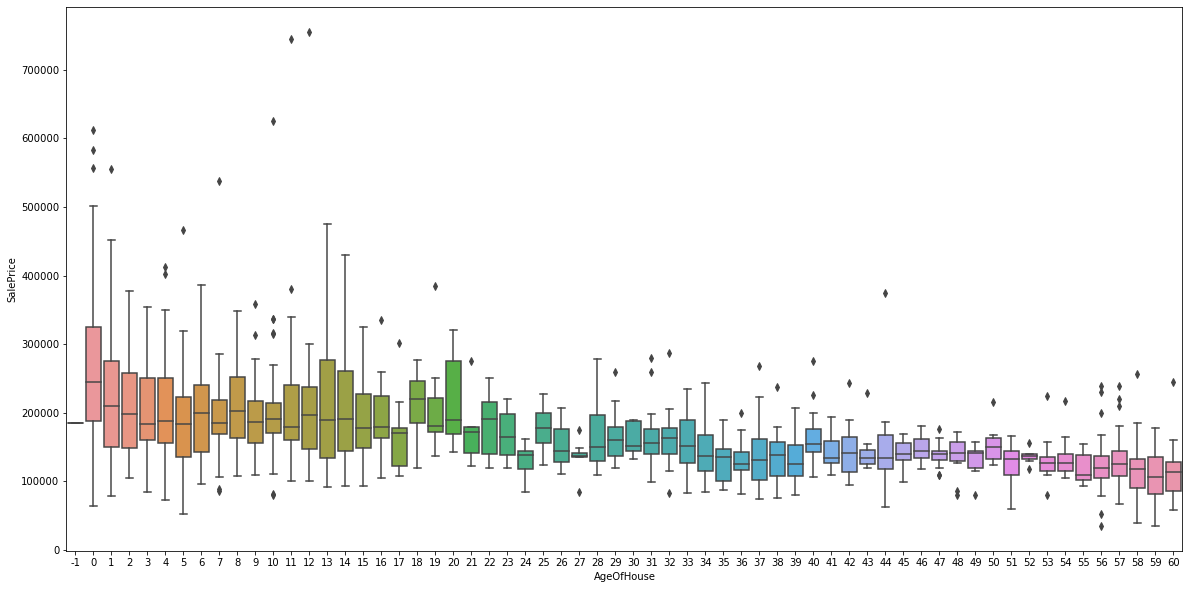

In [36]:
plt.figure(figsize=(20,10))
sns.boxplot(housing['AgeOfHouse'], housing['SalePrice'])
plt.show()

__Observations:__
-  As the property age is increasing, the price range is decreasing, but not steadily.

### 2.2 Treating outliers

In [37]:
# Get the list of numeric columns
housing_numeric = housing.select_dtypes(include=['int64', 'float64'])
vars_to_scale = housing_numeric.columns

In [38]:
housing_numeric.head()

,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtExposure,BsmtFinType1,...,Fireplaces,FireplaceQu,GarageCars,GarageArea,GarageQual,WoodDeckSF,OpenPorchSF,EnclosedPorch,SalePrice,AgeOfHouse
0,65.0,8450,7,5,196.0,4,3,4,1,6,...,0,6,2,548,3,0,61,0,208500,5
1,80.0,9600,6,8,0.0,3,3,4,4,5,...,1,3,2,460,3,298,0,0,181500,31
2,68.0,11250,7,5,162.0,4,3,4,2,6,...,1,3,2,608,3,0,42,0,223500,6
3,60.0,9550,7,5,0.0,3,3,3,1,5,...,1,4,3,642,3,0,35,272,140000,36
4,84.0,14260,8,5,350.0,4,3,4,3,6,...,1,3,3,836,3,192,84,0,250000,8


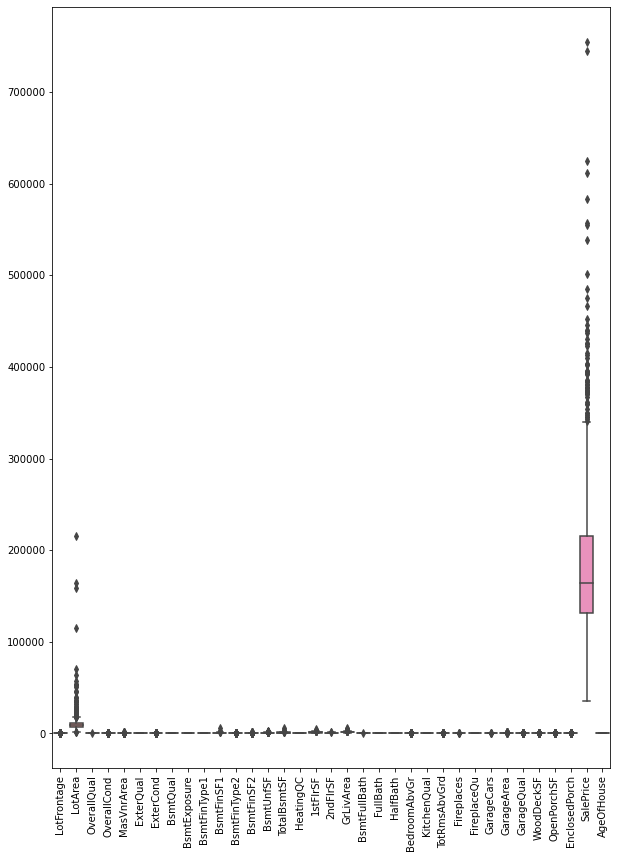

In [39]:
# Numeric data visualization with boxplot for checking outliers
plt.figure(figsize=[10,14])
plt.xticks(rotation=90)
sns.boxplot(data=housing[vars_to_scale]);

In [40]:
# Checking the shape of dataset before outlier treatment
housing.shape

(1412, 54)

In [41]:
# Treating outliers by floring and capping
for col in vars_to_scale:
    housing[col][housing[col] <= housing[col].quantile(0.05)] = housing[col].quantile(0.05)
    housing[col][housing[col] >= housing[col].quantile(0.95)] = housing[col].quantile(0.95)

In [42]:
# Checking the shape of dataset after outlier treatment
housing.shape

(1412, 54)

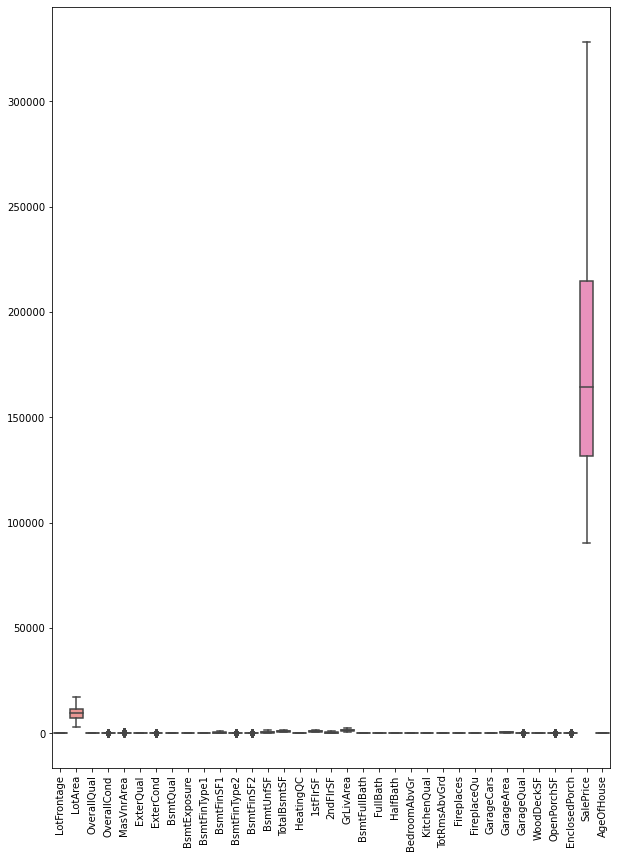

In [43]:
# Numeric data visualization with boxplot for checking outliers

plt.figure(figsize=[10,14])
plt.xticks(rotation=90)
sns.boxplot(data=housing[vars_to_scale]);

## Step 3: Data Preprocessing

### 3.1 Creating dummy variables for Categorical data

In [44]:
# Get the list of categorical data for encoding
housing_categorical = housing.select_dtypes(include='object')
housing_categorical.head()

,MSSubClass,MSZoning,LotShape,LandContour,LotConfig,Neighborhood,Condition1,BldgType,HouseStyle,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,Foundation,GarageType,GarageYrBlt,GarageFinish,SaleType,SaleCondition
0,60,RL,Reg,Lvl,Inside,CollgCr,Norm,1Fam,2Story,Gable,VinylSd,VinylSd,BrkFace,PConc,Attchd,2003.0,RFn,WD,Normal
1,20,RL,Reg,Lvl,FR2,Veenker,Feedr,1Fam,1Story,Gable,MetalSd,MetalSd,None,CBlock,Attchd,1976.0,RFn,WD,Normal
2,60,RL,IR1,Lvl,Inside,CollgCr,Norm,1Fam,2Story,Gable,VinylSd,VinylSd,BrkFace,PConc,Attchd,2001.0,RFn,WD,Normal
3,70,RL,IR1,Lvl,Corner,Crawfor,Norm,1Fam,2Story,Gable,Wd Sdng,Wd Shng,None,BrkTil,Detchd,1998.0,Unf,WD,Abnorml
4,60,RL,IR1,Lvl,FR2,NoRidge,Norm,1Fam,2Story,Gable,VinylSd,VinylSd,BrkFace,PConc,Attchd,2000.0,RFn,WD,Normal


In [45]:
# Creating dummies and dropping first
housing_dummies = pd.get_dummies(housing_categorical, drop_first=True)
housing_dummies.head()

,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [46]:
# Now, dropping the base columns
housing.drop(housing_categorical.columns, axis=1, inplace=True)
housing.shape

(1412, 35)

In [47]:
# Concatenating housing dataset and dummies
housing = pd.concat([housing,housing_dummies], axis=1)
housing.shape

(1412, 265)

In [48]:
# Removing columns which are very less or no correlation with SalePrice
remove_categorical_dummies = []
for col in housing_dummies.columns:
    cor = housing[col].corr(housing['SalePrice'])
    if (cor > -0.1) and (cor < 0.1) :
        remove_categorical_dummies.append(col)

In [49]:
# Removing columns with no correlation
housing.drop(remove_categorical_dummies, axis=1, inplace=True)

In [50]:
# Checking the shape of dataset after removing features with no correlation
housing.shape

(1412, 102)

## Step 4: Split data (train & test) & Scale variables

### 4.1 Splitting data

In [51]:
# Splitting the data into train and test dataset 
housing_train, housing_test = train_test_split(housing, test_size = 0.3, random_state = 42)

In [52]:
housing_train.shape

(988, 102)

In [53]:
housing_test.shape

(424, 102)

### 4.2 Scaling data

In [54]:
# Scale the data using minmax scaler
scale = MinMaxScaler()

housing_train[vars_to_scale] = scale.fit_transform(housing_train[vars_to_scale])
housing_test[vars_to_scale] = scale.transform(housing_test[vars_to_scale])

In [55]:
# Dividing data into X_train, y_train, X_test, y_test
y_train = housing_train.pop('SalePrice')
X_train = housing_train

y_test = housing_test.pop('SalePrice')
X_test = housing_test

## Step 5: Model Building

### 5.1 Feature Selection with RFE

In [56]:
# Step 1: Specifying the range of hyper parameters to tune
hyper_parameters = [{'n_features_to_select':list(range(1,103))}]

# Step 2: Performing grid search
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm)

model_cv = GridSearchCV(estimator=rfe, 
                        param_grid=hyper_parameters, 
                        scoring='r2', 
                        cv=5, 
                        verbose=1, 
                        return_train_score=True)

model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 102 candidates, totalling 510 fits


GridSearchCV(cv=5, estimator=RFE(estimator=LinearRegression()),
             param_grid=[{'n_features_to_select': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                   10, 11, 12, 13, 14, 15, 16,
                                                   17, 18, 19, 20, 21, 22, 23,
                                                   24, 25, 26, 27, 28, 29, 30, ...]}],
             return_train_score=True, scoring='r2', verbose=1)

In [57]:
# Optimal number of features
print('Optimal Number of features:', model_cv.best_params_['n_features_to_select'])

Optimal Number of features: 50


In [58]:
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select=50)
rfe = rfe.fit(X_train, y_train)

In [59]:
# List of columns selected with RFE
col = X_train.columns[rfe.support_]
col

Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'ExterQual',
       'BsmtQual', 'BsmtExposure', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'GrLivArea', 'KitchenQual', 'Fireplaces', 'FireplaceQu',
       'GarageCars', 'GarageArea', 'GarageQual', 'WoodDeckSF',
       'MSSubClass_160', 'MSSubClass_190', 'MSZoning_RL', 'LandContour_HLS',
       'LotConfig_CulDSac', 'Neighborhood_BrDale', 'Neighborhood_Edwards',
       'Neighborhood_NAmes', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt',
       'Neighborhood_OldTown', 'Neighborhood_Somerst', 'Neighborhood_StoneBr',
       'Condition1_Norm', 'BldgType_Twnhs', 'HouseStyle_SFoyer',
       'Exterior1st_CemntBd', 'Exterior1st_Wd Sdng', 'Exterior2nd_CmentBd',
       'Exterior2nd_Wd Sdng', 'Foundation_PConc', 'GarageType_Attchd',
       'GarageType_BuiltIn', 'GarageType_Detchd', 'GarageType_NotAvailable',
       'GarageYrBlt_2006.0', 'GarageYrBlt_2008.0', 'GarageYrBlt_NotAvailable',
       'GarageFinish_NotAvaila

In [60]:
# Re-constructing X_train and X_test
X_train = X_train[col]
X_test = X_test[col]

In [61]:
# list of alphas to tune
Parameters = {'alpha': [0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100]}

### 5.2 Building Ridge Model

In [62]:
# Building Ridge model using GridSearch Cross Validation
ridgereg = Ridge()

ridgereg_CV = GridSearchCV(estimator = ridgereg, 
                        param_grid = Parameters, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = 5,
                        verbose = 1,
                        return_train_score=True)            
ridgereg_CV.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.05, 0.1,
                                   0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0,
                                   2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0,
                                   20, 50, 100]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [63]:
# Creating dataframe with ridge regression results
ridgereg_CV_results = pd.DataFrame(ridgereg_CV.cv_results_)
ridgereg_CV_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.009380,0.007659,0.000000,0.000000,0.000001,{'alpha': 1e-06},-0.063614,-0.057188,-0.059495,-0.062953,...,-0.060632,0.002365,18,-0.055444,-0.057001,-0.056763,-0.055946,-0.056009,-0.056232,0.000570
1,0.003124,0.006248,0.000000,0.000000,0.00001,{'alpha': 1e-05},-0.063614,-0.057188,-0.059495,-0.062953,...,-0.060632,0.002365,17,-0.055444,-0.057001,-0.056763,-0.055946,-0.056009,-0.056232,0.000570
2,0.003124,0.006248,0.000000,0.000000,0.0001,{'alpha': 0.0001},-0.063614,-0.057188,-0.059495,-0.062953,...,-0.060632,0.002365,16,-0.055444,-0.057001,-0.056763,-0.055946,-0.056009,-0.056232,0.000570
3,0.000000,0.000000,0.003124,0.006249,0.001,{'alpha': 0.001},-0.063613,-0.057187,-0.059495,-0.062953,...,-0.060631,0.002365,15,-0.055444,-0.057000,-0.056762,-0.055946,-0.056009,-0.056232,0.000570
4,0.003124,0.006248,0.000000,0.000000,0.01,{'alpha': 0.01},-0.063599,-0.057172,-0.059497,-0.062950,...,-0.060624,0.002365,14,-0.055445,-0.056995,-0.056756,-0.055945,-0.056007,-0.056230,0.000568


In [64]:
# Best Alpha value
print('Best Alfa value using Ridge regression is:',ridgereg_CV.best_params_['alpha'])

Best Alfa value using Ridge regression is: 0.9


In [65]:
# Creating Ridge Model with optimal value of alpha
ridgereg = Ridge(alpha=ridgereg_CV.best_params_['alpha'])

# Fitting the model on training data
ridgereg.fit(X_train, y_train)

# Predicting target variable
y_train_pred = ridgereg.predict(X_train)
y_test_pred = ridgereg.predict(X_test)

In [66]:
Ridge_R2Squared_Train = r2_score(y_train, y_train_pred)
print("R-Squared (Train) =",Ridge_R2Squared_Train)
Ridge_R2Squared_Test = r2_score(y_test, y_test_pred)
print("R-Squared (Test) =", Ridge_R2Squared_Test)

Ridge_RSS_Train = np.sum(np.square(y_train - y_train_pred))
print("RSS (Train) =", Ridge_RSS_Train)
Ridge_RSS_Test = np.sum(np.square(y_test - y_test_pred))
print("RSS (Test) =", Ridge_RSS_Test)

Ridge_MSE_Train = mean_squared_error(y_train, y_train_pred)
print("MSE (Train) =", Ridge_MSE_Train)
Ridge_MSE_Test = mean_squared_error(y_test, y_test_pred)
print("MSE (Test) =", Ridge_MSE_Test)

Ridge_RMSE_Train = mean_squared_error(y_train, y_train_pred)**0.5
print("RMSE (Train) =", Ridge_RMSE_Train)
Ridge_RMSE_Test = mean_squared_error(y_test, y_test_pred)**0.5
print("RMSE (Test) =", Ridge_RMSE_Test) 

R-Squared (Train) = 0.9177728823866802
R-Squared (Test) = 0.8726832876660714
RSS (Train) = 5.8024789726626755
RSS (Test) = 4.171509797133593
MSE (Train) = 0.005872954425771939
MSE (Test) = 0.009838466502673568
RMSE (Train) = 0.07663520356710707
RMSE (Test) = 0.09918904426736638


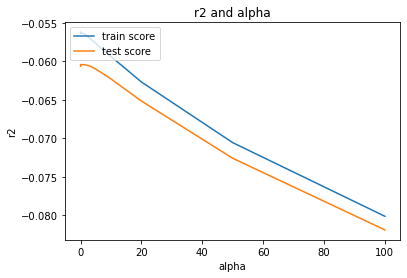

In [67]:
# plotting mean test and train scores with alpha 
ridgereg_CV_results['param_alpha'] = ridgereg_CV_results['param_alpha'].astype('int32')

# plotting
plt.plot(ridgereg_CV_results['param_alpha'], ridgereg_CV_results['mean_train_score'])
plt.plot(ridgereg_CV_results['param_alpha'], ridgereg_CV_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('r2')
plt.title("r2 and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

### 5.3 Building Lasso Model

In [68]:
# Building Lasso Regression model using GridSearch Cross Validation
Lassoreg = Lasso()

LassoCV = GridSearchCV(estimator = Lassoreg, 
                        param_grid = Parameters, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = 5, 
                        return_train_score=True,
                        verbose = 1, n_jobs=-1)            
LassoCV.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': [1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.05, 0.1,
                                   0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0,
                                   2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0,
                                   20, 50, 100]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [69]:
# Creating dataframe with Lasso regression results
LassoCV_results = pd.DataFrame(LassoCV.cv_results_)
LassoCV_results = LassoCV_results[LassoCV_results['param_alpha']<=100]
LassoCV_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.047208,0.011585,0.005338,0.006695,0.000001,{'alpha': 1e-06},-0.063608,-0.057179,-0.059501,-0.062957,...,-0.060631,0.002366,2,-0.055444,-0.056999,-0.056758,-0.055945,-0.056009,-0.056231,0.000569
1,0.032624,0.014922,0.004545,0.004079,0.00001,{'alpha': 1e-05},-0.063551,-0.057098,-0.059552,-0.062992,...,-0.060617,0.002379,1,-0.055450,-0.056983,-0.056726,-0.055940,-0.056006,-0.056221,0.000558
2,0.013408,0.001814,0.005099,0.002768,0.0001,{'alpha': 0.0001},-0.063400,-0.056367,-0.060151,-0.063585,...,-0.060767,0.002639,3,-0.055727,-0.057221,-0.056649,-0.056214,-0.056206,-0.056404,0.000502
3,0.010949,0.004724,0.004591,0.001196,0.001,{'alpha': 0.001},-0.065562,-0.057343,-0.062891,-0.066490,...,-0.063098,0.003186,4,-0.059316,-0.061903,-0.060000,-0.060010,-0.060201,-0.060286,0.000863
4,0.006890,0.001108,0.002303,0.001165,0.01,{'alpha': 0.01},-0.082618,-0.078036,-0.083669,-0.090720,...,-0.084071,0.004110,5,-0.082535,-0.083585,-0.083165,-0.081294,-0.081640,-0.082444,0.000872


In [70]:
# Best Alpha value
print('Best Alfa value using Lasso regression is:',LassoCV.best_params_['alpha'])

Best Alfa value using Lasso regression is: 1e-05


In [71]:
## Creating Lasso Model against optimal value of alpha
Lassoreg = Lasso(alpha=LassoCV.best_params_['alpha'])

# Fitting the model on training data
Lassoreg.fit(X_train, y_train)

Lasso(alpha=1e-05)

In [72]:
# Predicting target variables with Lasso Regression
y_train_pred = Lassoreg.predict(X_train)
y_pred = Lassoreg.predict(X_test)

In [73]:
Lasso_R2Squared_Train = r2_score(y_train, y_train_pred)
print("R-Squared (Train) =",Lasso_R2Squared_Train)
Lasso_R2Squared_Test = r2_score(y_test, y_pred)
print("R-Squared (Test) =", Lasso_R2Squared_Test)

Lasso_RSS_Train = np.sum(np.square(y_train - y_train_pred))
print("RSS (Train) =", Lasso_RSS_Train)
Lasso_RSS_Test = np.sum(np.square(y_test - y_pred))
print("RSS (Test) =", Lasso_RSS_Test)

Lasso_MSE_Train = mean_squared_error(y_train, y_train_pred)
print("MSE (Train) =", Lasso_MSE_Train)
Lasso_MSE_Test = mean_squared_error(y_test, y_pred)
print("MSE (Test) =", Lasso_MSE_Test)

Lasso_RMSE_Train = mean_squared_error(y_train, y_train_pred)**0.5
print("RMSE (Train) =", Lasso_RMSE_Train)
Lasso_RMSE_Test = mean_squared_error(y_test, y_pred)**0.5
print("RMSE (Test) =", Lasso_RMSE_Test)

R-Squared (Train) = 0.9182712149390205
R-Squared (Test) = 0.8713584882191904
RSS (Train) = 5.767313394198089
RSS (Test) = 4.214916619149281
MSE (Train) = 0.0058373617350183085
MSE (Test) = 0.009940841082899247
RMSE (Train) = 0.07640262911064193
RMSE (Test) = 0.09970376664348869


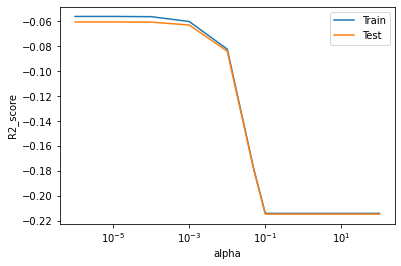

In [74]:
## Plotting R2 score vs alpha values
plt.plot(LassoCV_results['param_alpha'], LassoCV_results['mean_train_score'], label='Train')
plt.plot(LassoCV_results['param_alpha'], LassoCV_results['mean_test_score'], label='Test')
plt.xlabel('alpha')
plt.ylabel('R2_score')
plt.xscale('log')
plt.legend()
plt.show()

In [75]:
# Making table of all variable for Model output comparison

coeff_df = pd.DataFrame(X_train.columns, columns=['Columns'])

coeff_df['Ridge'] = ridgereg.coef_
coeff_df['Lasso'] = Lassoreg.coef_

# View the coefficients
coeff_df

,Columns,Ridge,Lasso
0,LotFrontage,0.022028,2.009708e-02
1,LotArea,0.068385,6.730832e-02
2,OverallQual,0.150698,1.482946e-01
3,OverallCond,0.093395,9.397092e-02
4,ExterQual,0.028256,2.618022e-02
5,BsmtQual,0.052855,5.111528e-02
6,BsmtExposure,0.030301,3.022361e-02
7,BsmtFinSF1,0.002118,-4.093914e-02
8,BsmtFinSF2,-0.040505,-6.270849e-02
9,BsmtUnfSF,-0.130105,-1.835136e-01


In [76]:
coeff_df[coeff_df['Lasso']!=0]

,Columns,Ridge,Lasso
0,LotFrontage,0.022028,2.009708e-02
1,LotArea,0.068385,6.730832e-02
2,OverallQual,0.150698,1.482946e-01
3,OverallCond,0.093395,9.397092e-02
4,ExterQual,0.028256,2.618022e-02
5,BsmtQual,0.052855,5.111528e-02
6,BsmtExposure,0.030301,3.022361e-02
7,BsmtFinSF1,0.002118,-4.093914e-02
8,BsmtFinSF2,-0.040505,-6.270849e-02
9,BsmtUnfSF,-0.130105,-1.835136e-01


In [77]:
Lassoreg.coef_[Lassoreg.coef_!=0]

array([ 2.00970799e-02,  6.73083244e-02,  1.48294552e-01,  9.39709193e-02,
        2.61802181e-02,  5.11152842e-02,  3.02236135e-02, -4.09391449e-02,
       -6.27084858e-02, -1.83513639e-01,  2.22322804e-01,  3.19311783e-01,
        6.58390489e-02,  8.98696097e-02,  3.00568732e-02,  5.15385267e-02,
        5.68411957e-02,  1.83378510e-01,  2.08541022e-02, -5.17564409e-02,
       -6.67735044e-02,  2.11784636e-02,  3.08546123e-02,  2.18472246e-02,
        6.68258212e-02, -3.15732574e-02, -2.17096288e-02,  1.13083063e-01,
        8.29395584e-02, -3.27548008e-02,  8.99545285e-02,  4.40207289e-02,
        4.04166528e-02, -3.94347578e-02, -3.62077336e-02, -9.93005068e-02,
       -4.38915776e-02,  1.27523509e-01,  3.88798866e-02,  2.56856512e-02,
        3.66775359e-02,  4.67735225e-02,  3.81388520e-02, -1.30516820e-01,
        2.68632528e-02,  9.01054847e-02, -4.08912430e-04, -5.95918864e-18,
        2.83742174e-02,  6.10428014e-02])

In [78]:
coeff_df[['Columns','Lasso']].sort_values(by='Lasso', ascending=False)[:10]

,Columns,Lasso
11,GrLivArea,0.319312
10,TotalBsmtSF,0.222323
17,GarageQual,0.183379
2,OverallQual,0.148295
37,Exterior2nd_CmentBd,0.127524
27,Neighborhood_NoRidge,0.113083
3,OverallCond,0.093971
45,GarageYrBlt_2008.0,0.090105
30,Neighborhood_Somerst,0.089955
13,Fireplaces,0.089870


In [79]:
# Printing Stats of both model together
print('Score Type     | Lasso   | Ridge')
print('--------------------------------')
print('R2_Score_Train',  '|',np.round(Lasso_R2Squared_Train,4),' |', np.round(Ridge_R2Squared_Train,4))
print('R2_Score_Test',  ' |',np.round(Lasso_R2Squared_Test,4),' |', np.round(Ridge_R2Squared_Test,4))
print('RSS_Train','     |',np.round(Lasso_RSS_Train,4),' |', np.round(Ridge_RSS_Train,4))
print('RSS_Test','      |',np.round(Lasso_RSS_Test,4),' |', np.round(Lasso_RSS_Test,4))
print('MSE_Train','     |',np.round(Lasso_MSE_Train,4),'  |', np.round(Ridge_MSE_Train,4))
print('MSE_Test','      |',np.round(Lasso_MSE_Test,4),' |', np.round(Ridge_MSE_Test,4))
print('RMSE_Train','    |',np.round(Lasso_RMSE_Train,4),' |', np.round(Ridge_RMSE_Train,4))
print('RMSE_Test','     |',np.round(Lasso_RMSE_Test,4),' |', np.round(Ridge_RMSE_Test,4))

Score Type     | Lasso   | Ridge
--------------------------------
R2_Score_Train | 0.9183  | 0.9178
R2_Score_Test  | 0.8714  | 0.8727
RSS_Train      | 5.7673  | 5.8025
RSS_Test       | 4.2149  | 4.2149
MSE_Train      | 0.0058   | 0.0059
MSE_Test       | 0.0099  | 0.0098
RMSE_Train     | 0.0764  | 0.0766
RMSE_Test      | 0.0997  | 0.0992


__Observations:__

By comparing both model performance, the train data result on ridge and lasso are performing almost same.
R2 for Ridge is: 0.9178 and for Lasso is: 0.9183
And for test data, R2 for Ridge is: 0.8727 and for Lasso is: 0.8714

Below are the top 10 features in Ridge Regression with high beta coefficients:
-  'GrLivArea',
-  'TotalBsmtSF',
-  'OverallQual',
-  'GarageQual',
-  'Neighborhood_NoRidge',
-  'OverallCond',
-  'GarageYrBlt_2008.0',
-  'Fireplaces',
-  'Exterior2nd_CmentBd',
-  'Neighborhood_Somerst'

Below are the top 10 features in Lasso Regression with high beta coefficients:
-  'GrLivArea',
-  'TotalBsmtSF',
-  'GarageQual',
-  'OverallQual',
-  'Exterior2nd_CmentBd',
-  'Neighborhood_NoRidge',
-  'OverallCond',
-  'GarageYrBlt_2008.0',
-  'Neighborhood_Somerst',
-  'Fireplaces'


Below are the features that are highly correlated with SaleData

-  Positively correlated with OverallQual (0.79)
-  Positively correlated with MasVnrArea (0.47)
-  Positively correlated with ExterQual (0.68)
-  Positively correlated with BsmtQual (0.64)
-  Positiveely correlated with TotalBsmtSF (0.61)
-  Positiveely correlated with 1stFlrSF (0.61)
-  Positiveely correlated with GrLivArea (0.71)
-  Positively correlated with FullBath (0.58)
-  Positively correlated with KitchenQual (0.65)
-  Positively correlated with TotRmsAbvGrd (0.55)
-  Positively correlated with GarageCars (0.64)
-  Positively correlated with GarageArea (0.62)
-  Negetively correlated with AgeOfHouse (0.5)

Best Alfa value using Ridge regression is: 0.9
<br>
Best Alfa value using Lasso regression is: 0.00001